In [585]:
import pandas as pd
from os import walk

In [586]:
#Carga de los datasets
datasets_names = []
path_df = '../datasets/original_files/'
for (dirpath, dirnames, filenames) in walk(path_df):
    datasets_names.extend(filenames)
    break
datasets_names

['boston-listings.csv.gz',
 'los_angeles-listings.csv.gz',
 'new_york_city-listings.csv.gz']

In [587]:
#Carga del dataframe
dataFrame = False
first = True
for name in datasets_names:
    if(first):
        first = False
        dataFrame = pd.read_csv(path_df+name, compression='gzip')
        dataFrame.set_index('id', drop=False, inplace=True)
        print('adding', len(dataFrame), 'rows')
        dataFrame ['file']=name 
    else:
        _tmpDf = pd.read_csv(path_df+name, compression='gzip')
        _tmpDf.set_index('id', drop=False, inplace=True)
        _tmpDf['file']=name
        print('adding', len(_tmpDf), 'rows')
        dataFrame = pd.concat([dataFrame, _tmpDf])
        del _tmpDf
print('total rows:', len(dataFrame))
#for column in dataFrame.columns:
#   print(column)

adding 3799 rows
adding 38481 rows
adding 50796 rows
total rows: 93076


In [588]:
#Transformar las variables String en Float

dataFrame["price"]=dataFrame["price"].str.replace('$', '').str.replace(',', '').astype(float)
dataFrame["host_acceptance_rate"]=dataFrame["host_acceptance_rate"].str.replace('%', '').str.replace(',', '').astype(float)
dataFrame["host_response_rate"]=dataFrame["host_response_rate"].str.replace('%', '').str.replace(',', '').astype(float)
dataFrame["host_since"]=dataFrame["host_since"].str.replace('-', '').str.replace(',', '').astype(float)
dataFrame["first_review"]=dataFrame["first_review"].str.replace('-', '').str.replace(',', '').astype(float)
dataFrame["last_review"]=dataFrame["last_review"].str.replace('-', '').str.replace(',', '').astype(float)


In [589]:
#Variables numericas y alfanumricas a utilizar
df=dataFrame[[
'host_since', 'host_response_rate', 'host_acceptance_rate','host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'neighbourhood', 'city', 'state', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price','guests_included', 'minimum_nights', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'reviews_per_month','file']]

#Variables alfanumricas a mayusculas
for column in (df.columns[df.dtypes == 'O']):
    df[column]=df[column].str.strip().str.upper()

In [590]:
# Limpia valores numericos
from scipy import stats
import numpy as np

num_cols = (df.columns[df.dtypes != 'O']) # Selecciona columnas numericas
df[num_cols]=df[num_cols].fillna(df[num_cols].median()) #Completa Missing con la Mediana
df=df[(np.abs(stats.zscore(df[num_cols])) < 3).all(axis=1)] #Filtra Outliers


In [591]:
# Limpia valores String

obj_cols=df.columns[df.dtypes == 'O']
for column in (obj_cols):
    proportion = 100
    column_freq = df[column].value_counts()
    max_val = (column_freq.max())
    min_val = (max_val/proportion)
    df=(df[df[column].isin(column_freq[column_freq>min_val].index)])



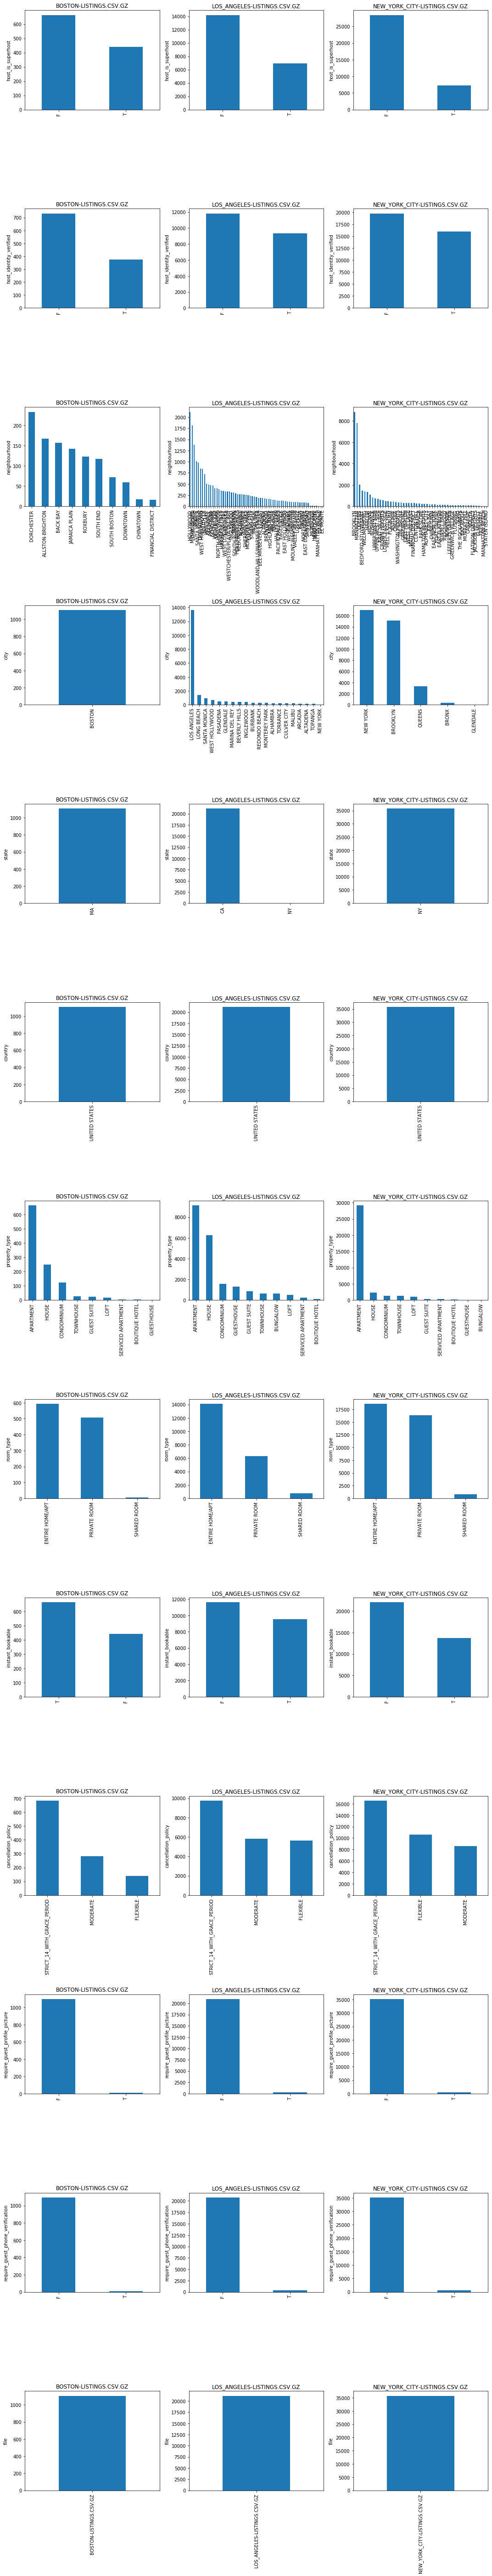

In [595]:
import matplotlib.pyplot as plt
obj_cols=df.columns[df.dtypes == 'O']
rows=obj_cols.size
cities=df['file'].unique().size
fig = plt.figure(figsize=(15,heigth*6))

sp_index=1



obj_cols=df.columns[df.dtypes == 'O']
for column in (obj_cols):
    for file_name in df['file'].unique(): 
        a = fig.add_subplot(rows,cities,sp_index, autoscale_on=True )
        a.yaxis.set_label_text(column)
        a.set_title(file_name)
        df[df['file'] == file_name ][column].value_counts().plot(kind='bar', ax=a) #horizontal bar plot
        sp_index += 1

plt.tight_layout()


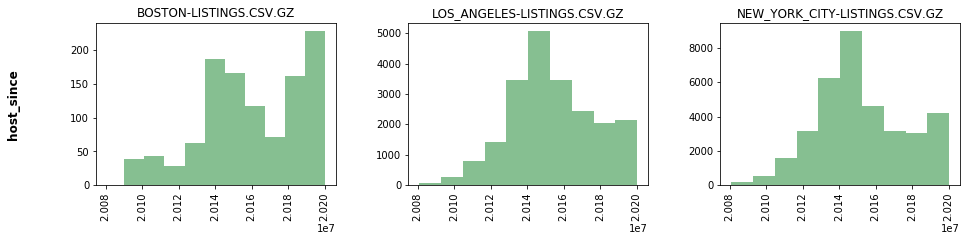

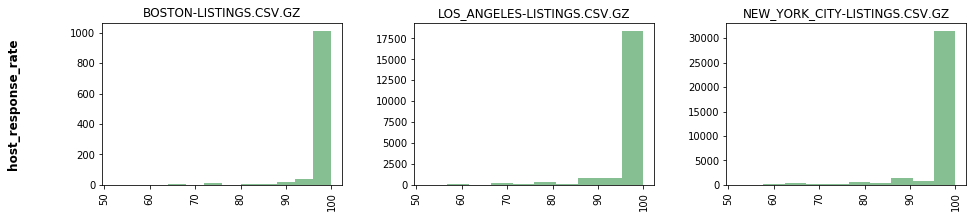

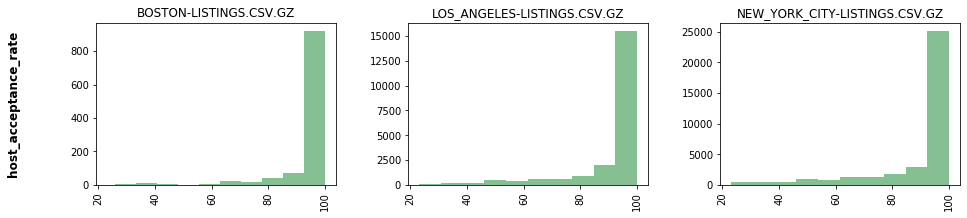

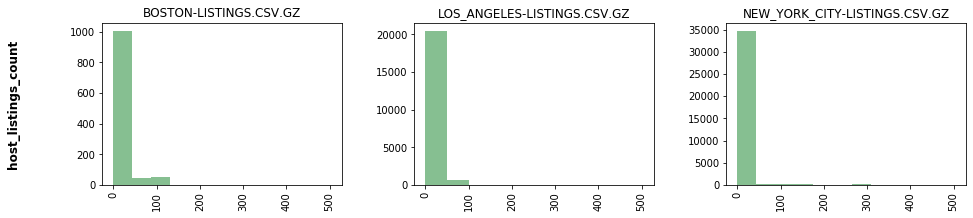

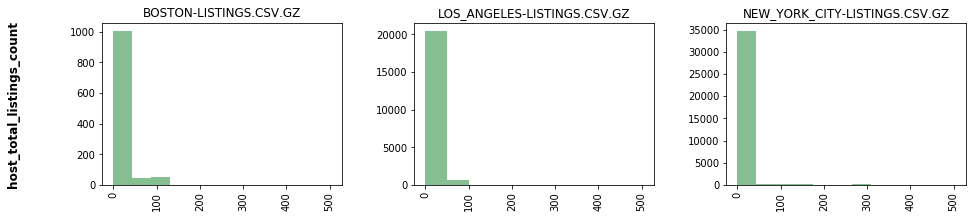

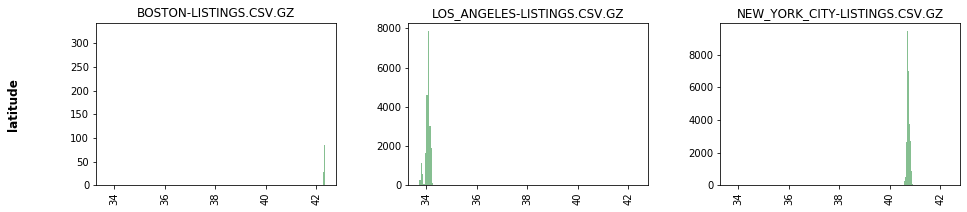

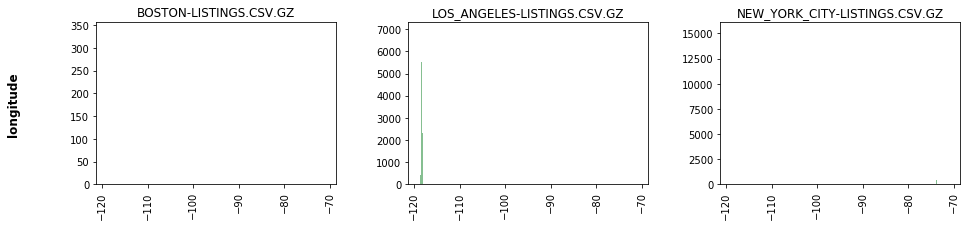

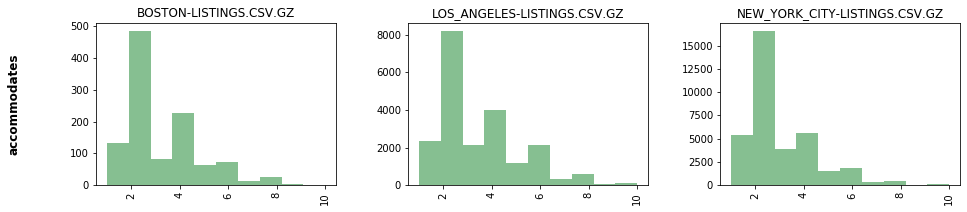

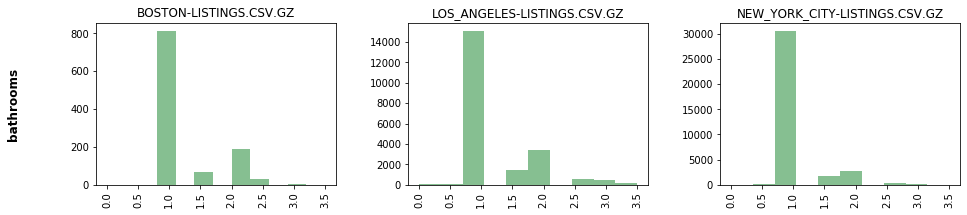

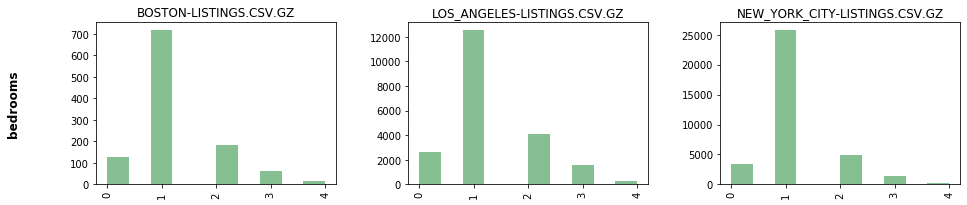

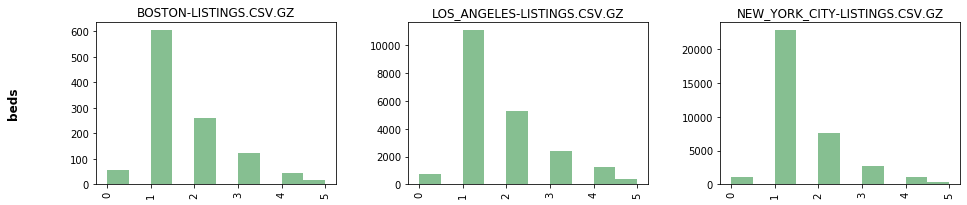

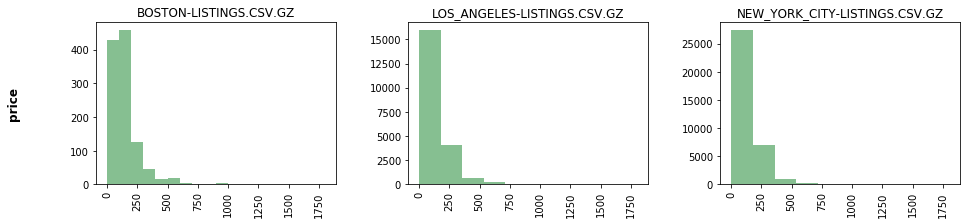

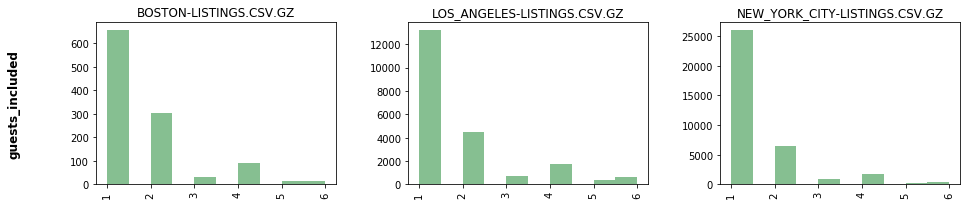

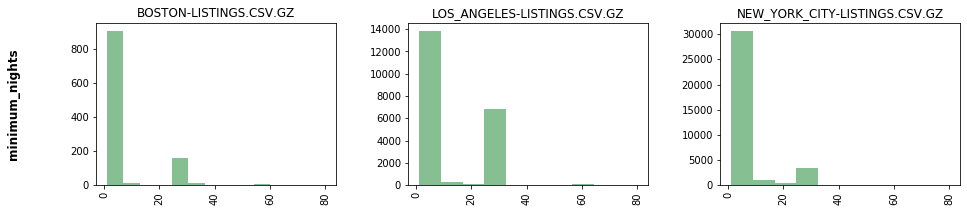

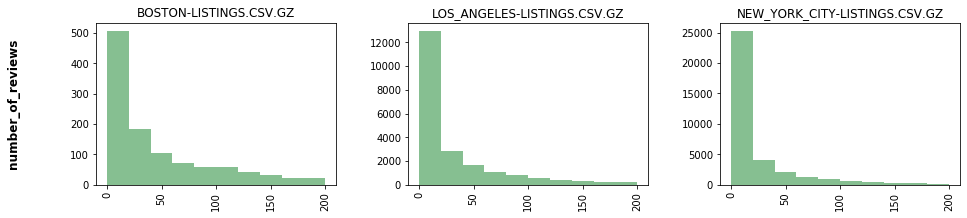

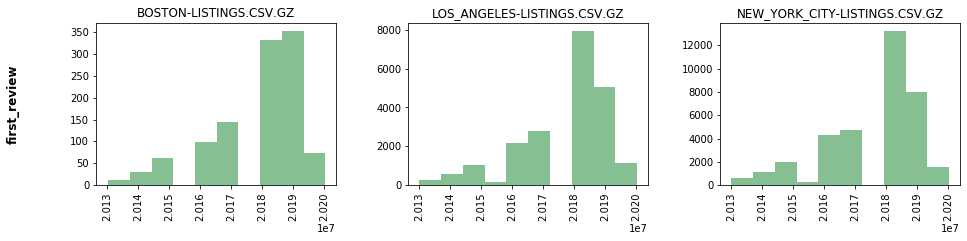

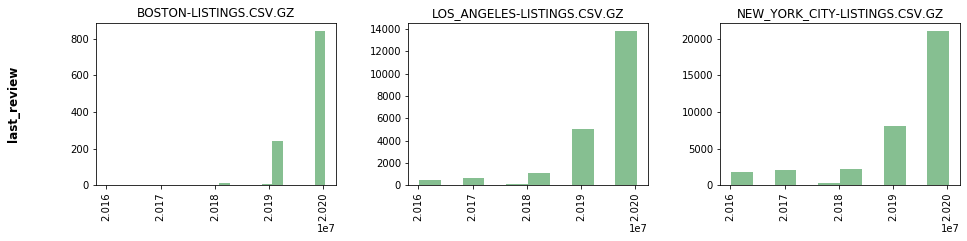

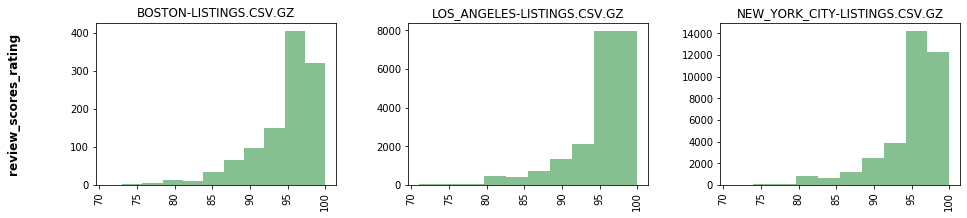

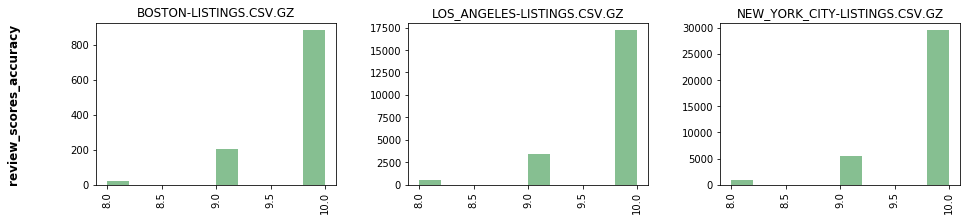

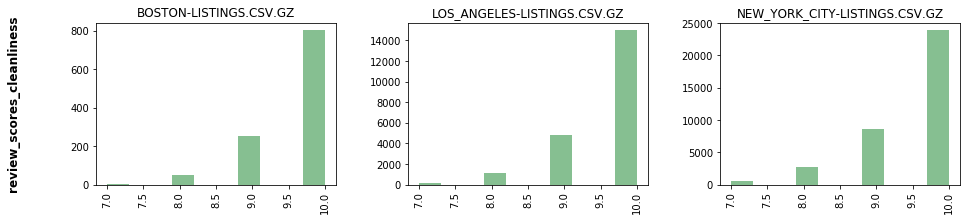

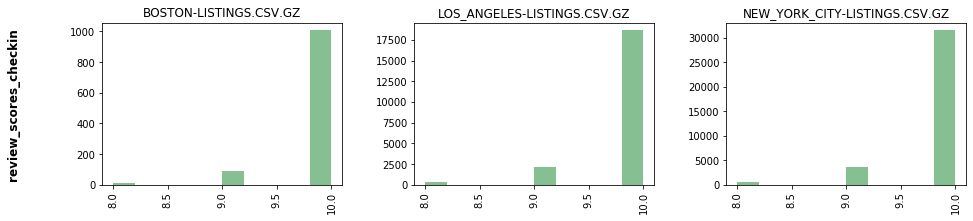

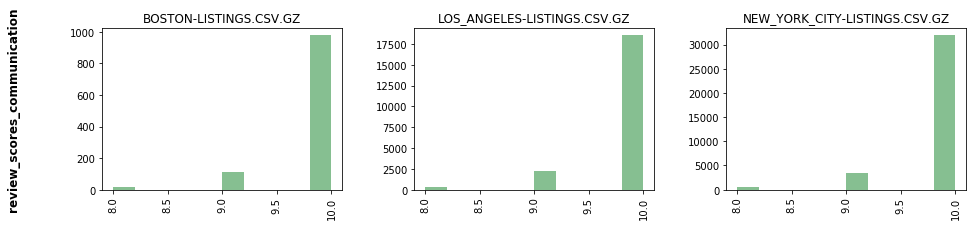

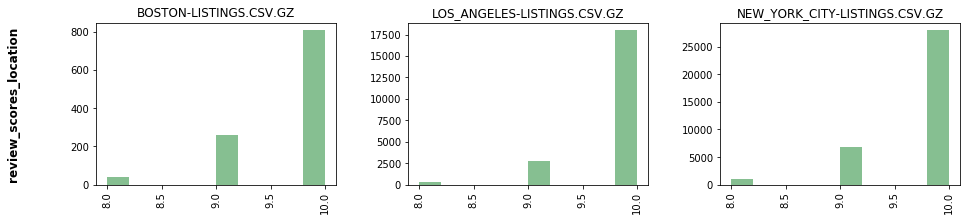

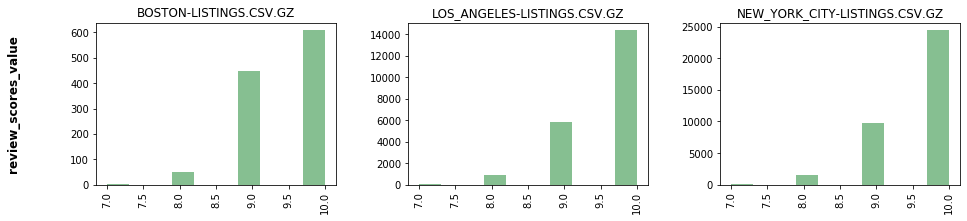

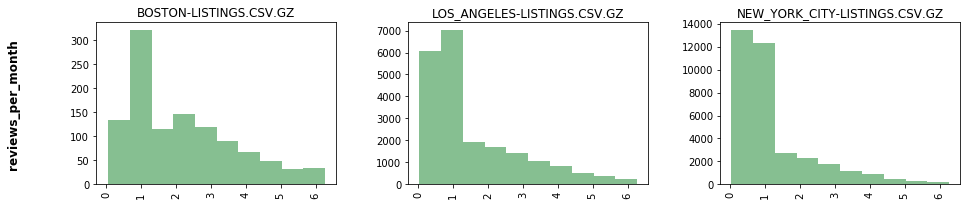

In [593]:
# Grafica Histogramas por ciudad 
for column in num_cols:
    h = df.hist(column=column, by='file' , bins=10,  figsize=(15,3), layout=(1,3), color='#86bf91',  sharex=True)
    for i,x in enumerate(h):
        # Set y-axis label
        if i == 0:
            x.set_ylabel(column, labelpad=50, weight='bold', size=12)
        

